# **Problem 1: Lets determine which numeric variable is more important in determining CVD (Male)**
*First We split the Dataset into male sets*

In [26]:
maleData = cardioData.query("gender == 'male'")

In [27]:
maleData.head()

,age,age(years),height,weight,BMI,ap_hi,ap_lo,MAP,gender,bp_cat,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,168,62.0,21.967120,110,80,90.000000,male,hypertension S1,normal,normal,no,no,yes,no
3,17623,48,169,82.0,28.710479,150,100,116.666667,male,hypertension S2,normal,normal,no,no,yes,yes
7,22584,62,178,95.0,29.983588,130,90,103.333333,male,hypertension S1,well above normal,well above normal,no,no,yes,yes
11,18815,52,173,60.0,20.047446,120,80,93.333333,male,hypertension S1,normal,normal,no,no,yes,no
12,14791,41,165,60.0,22.038567,120,80,93.333333,male,hypertension S1,normal,normal,no,no,no,no


In [28]:
#Here we extract the relevant numeric variables from the dataset 
maleDataNum =  maleData[['BMI','MAP','age(years)']]
maleDataNum.head()

,BMI,MAP,age(years)
0,21.967120,90.000000,50
3,28.710479,116.666667,48
7,29.983588,103.333333,62
11,20.047446,93.333333,52
12,22.038567,93.333333,41


## Correlation between Variables

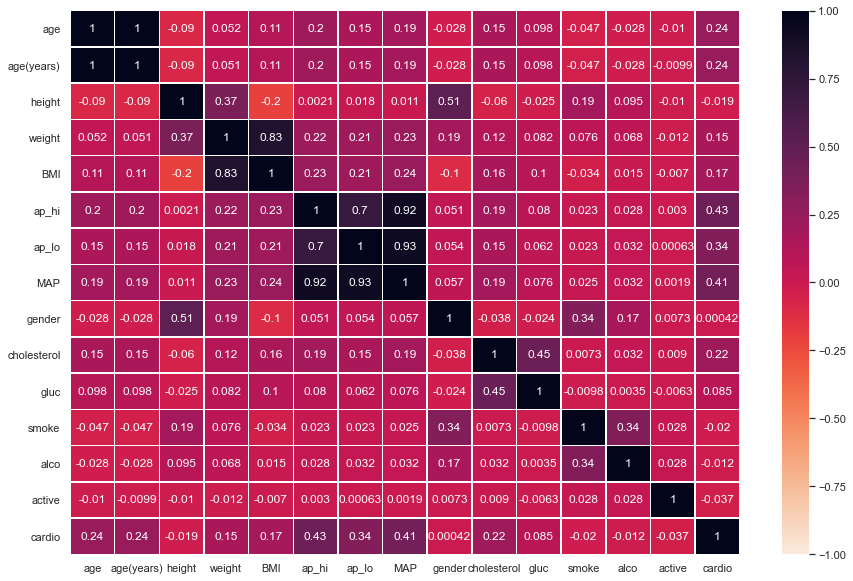

In [29]:
#use heatmap to visuallise which variable has the highest corr
cardioCData=cardioData.copy()
# create a dictionary to map the old values to the new definition values
cholesterol_map = { 'normal':1,  'above normal':2,  'well above normal':3}
glucose_map={ 'normal':1,  'above average':2,  'well above normal':3}
smoking_map={'no':0,'yes':1}
alcohol_map={'no':0,'yes':1}
active_map={'no':0,'yes':1}
cvd_map={'no':0,'yes':1}
gender_map={'female':1,'male':2}

# use the replace() method to map the values in the 'cholesterol' column
cardioCData['cholesterol'] = cardioCData['cholesterol'].replace(cholesterol_map)
cardioCData['gluc'] = cardioCData['gluc'].replace(glucose_map)
cardioCData['smoke'] = cardioCData['smoke'].replace(smoking_map)
cardioCData['alco'] = cardioCData['alco'].replace(alcohol_map)
cardioCData['active'] = cardioCData['active'].replace(active_map)
cardioCData['cardio'] = cardioCData['cardio'].replace(cvd_map)
cardioCData['gender'] = cardioCData['gender'].replace(gender_map)


#Changing object datataypes to factors
cardioCData['cholesterol'] = cardioCData['cholesterol'].astype('int64')
cardioCData['gluc'] = cardioCData['gluc'].astype('int64')
cardioCData['smoke'] = cardioCData['smoke'].astype('int64')
cardioCData['alco'] = cardioCData['alco'].astype('int64')
cardioCData['active'] = cardioCData['active'].astype('int64')
cardioCData['cardio'] = cardioCData['cardio'].astype('int64')
fig, ax = plt.subplots(figsize=(15,10))
sb.heatmap(cardioCData.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r",linewidths=0.5)
plt.show()

*Based of the correlation matrix, we can identify that MAP has the highest correlation to cardio*

## Decision Tree Classifier

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7035561005518087

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7099503402611734



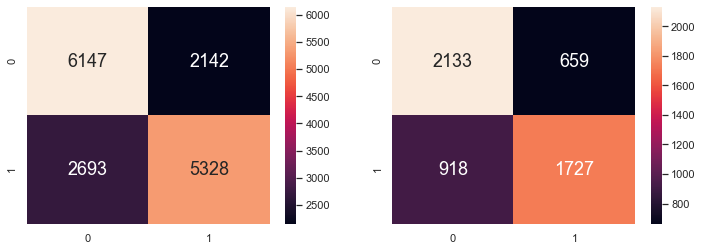

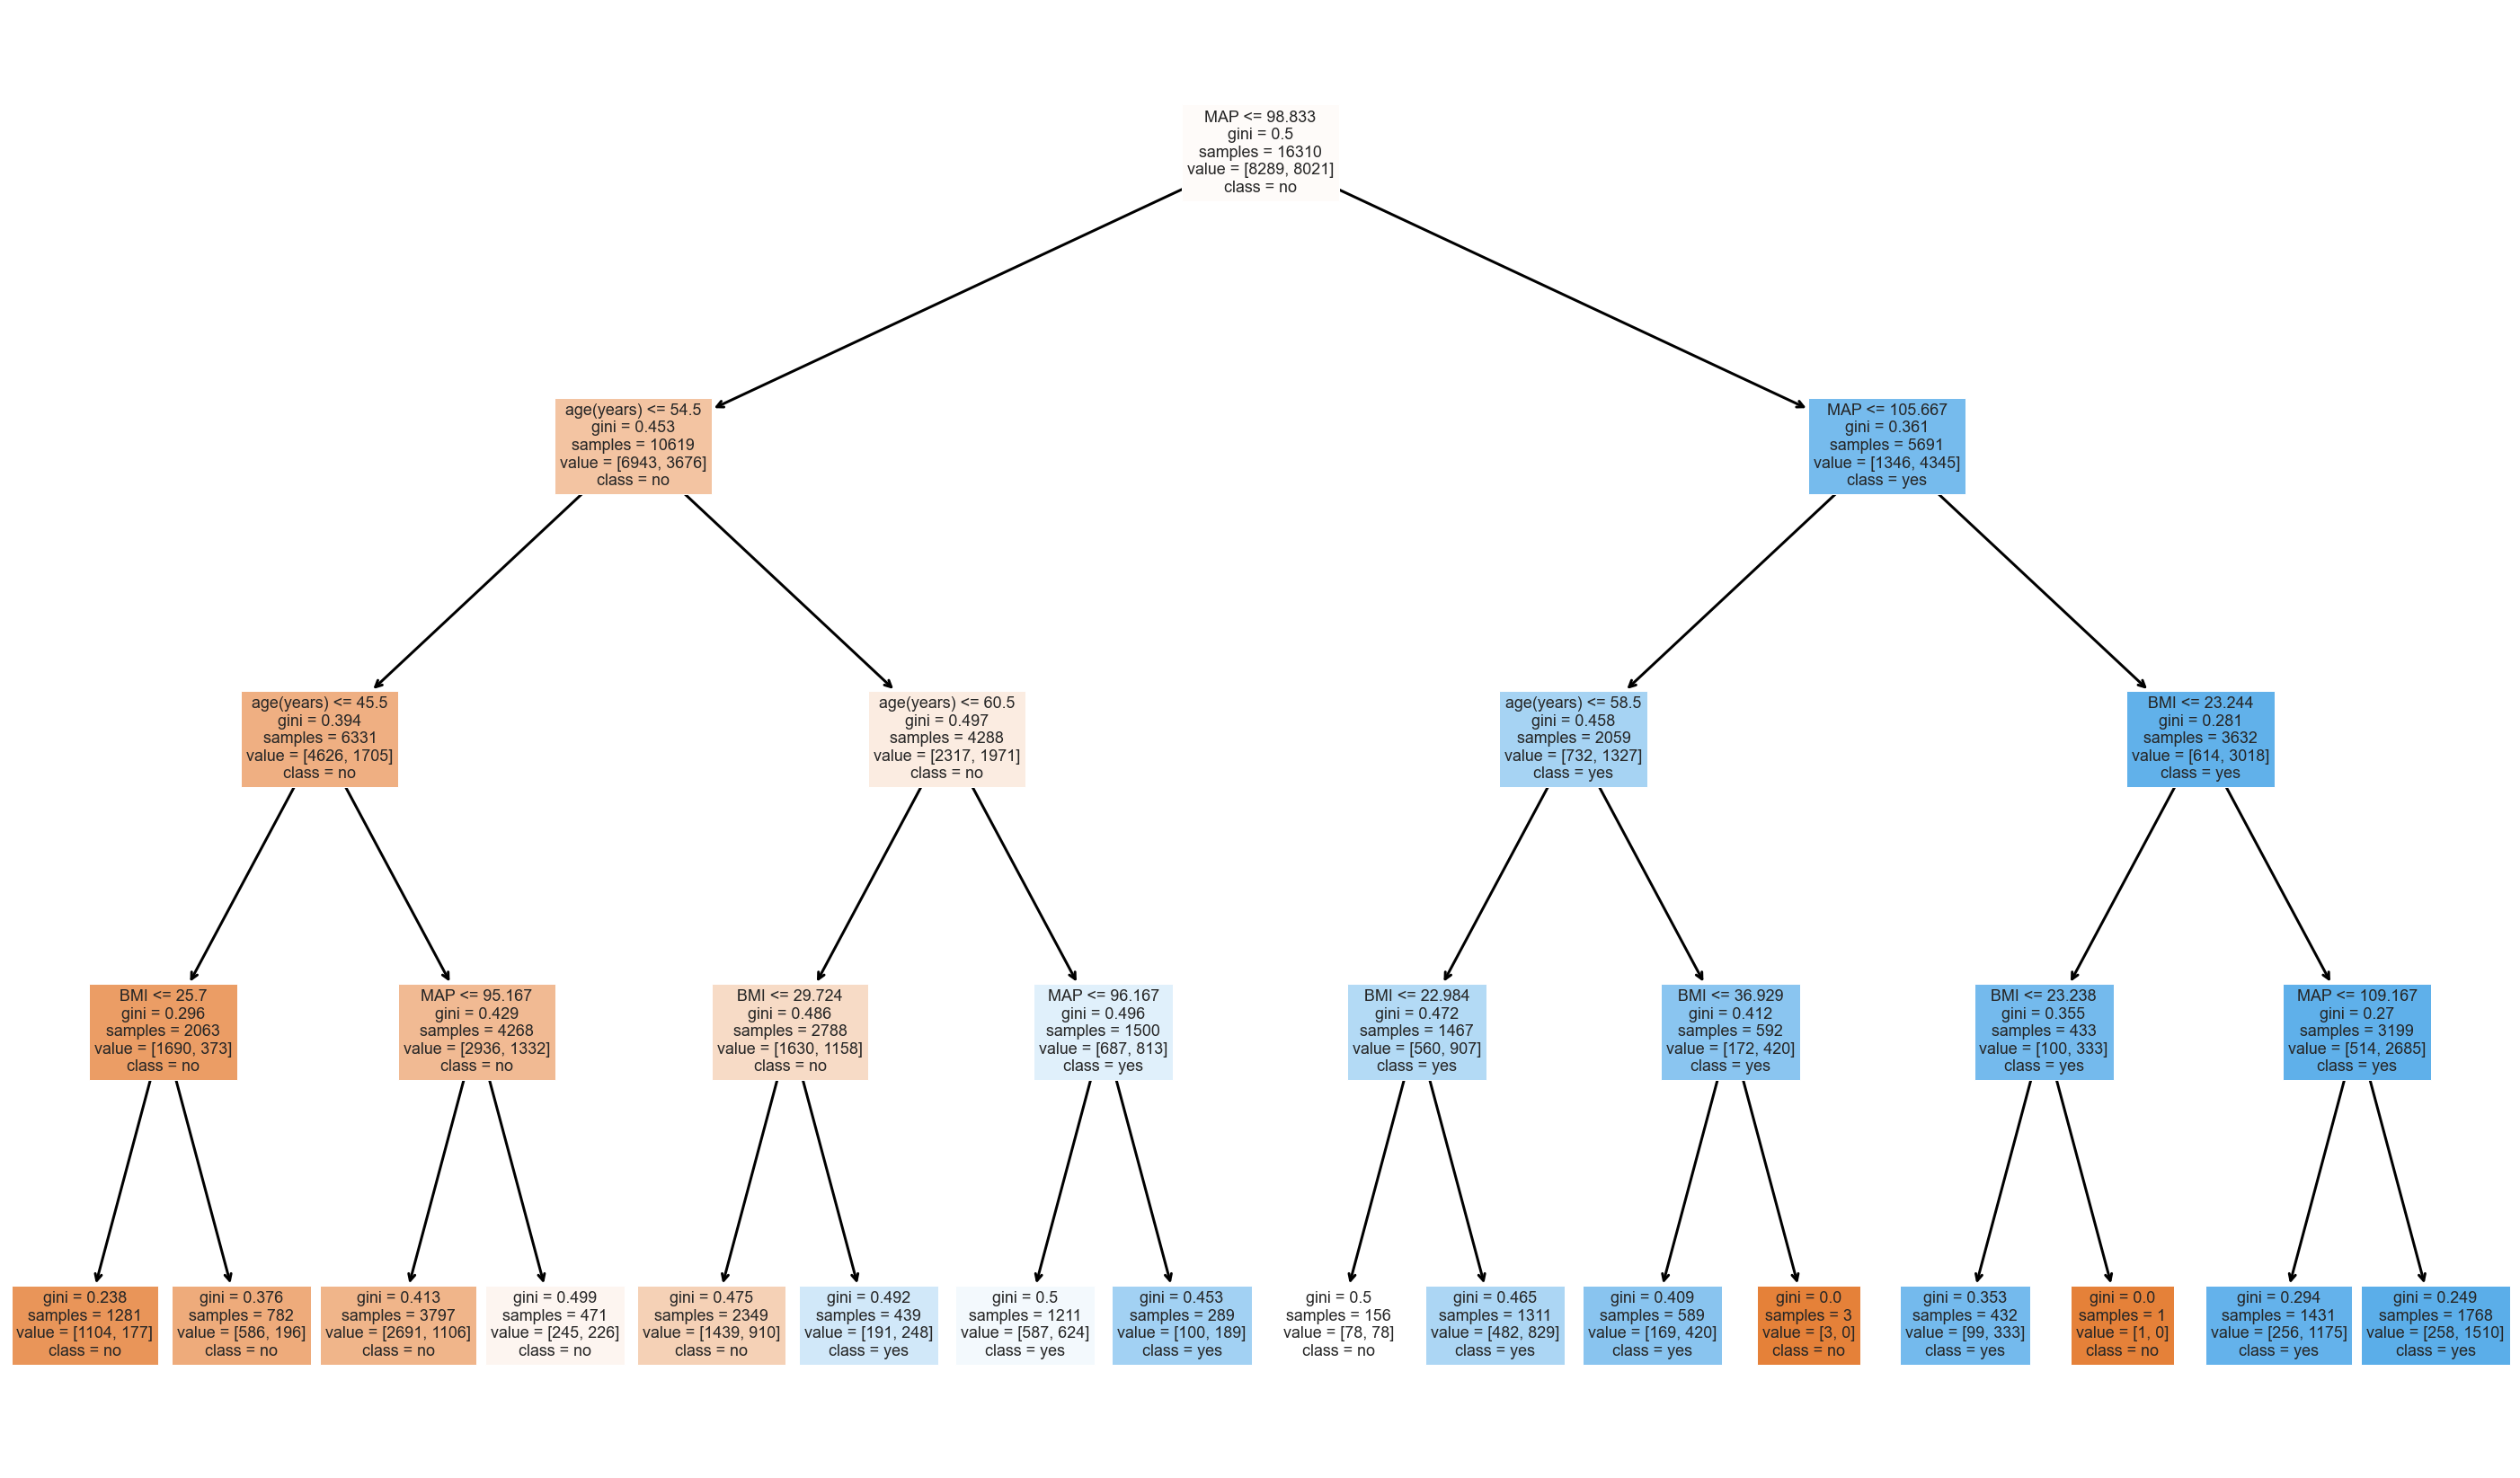

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(maleData['cardio'])
X = pd.DataFrame(maleData[['MAP','age(years)','BMI']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(50, 30))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

**Determine Which Numeric Variable is most important in determining CVD in males**

In [31]:
importances = dectree.feature_importances_

# sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# print the feature importances in descending order
for i in sorted_indices:
    print(X.columns[i], importances[i])

MAP 0.816365198591355
age(years) 0.15581808294511323
BMI 0.027816718463531752


*Since our Class only have male students, let us show you the distribution for males with normal glucose and cholesterol levels. We can see the positive CVD cases tend to be on the right side which is higher in MAP.* 
**From here we can also confirm the MAP is the most important variable in determining CVD in males**